In [8]:
x = np.linspace(0, 300, 3001)

In [9]:
def signal_h(x):
    white_noise = np.random.normal(0,0.025, 3001)
    y = np.zeros(3001)
    
    for i, v in enumerate(x):
        if v >= 100 and v <= 200:
            y[i] = 1
    
    return y + white_noise

In [10]:
h = signal_h(x)

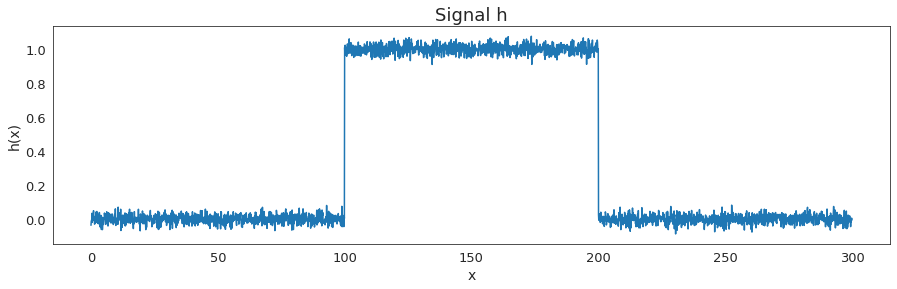

In [11]:
fig = plt.figure(figsize = (15, 4))

plt.title('Signal h')

plt.xlabel('x')
plt.ylabel('h(x)')

plt.plot(x, h)

In [12]:
gaussian = lambda x, m, s: 1/(np.sqrt(2*np.pi*s**2))*np.exp(-(x - m)**2/(2*s**2))

In [13]:
gaussian_dist = gaussian(x - x.mean(), 0, 3)

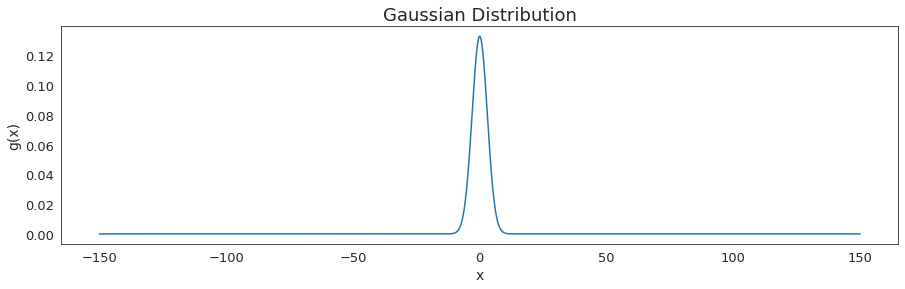

In [14]:
fig = plt.figure(figsize = (15, 4))

plt.title('Gaussian Distribution')

plt.xlabel('x')
plt.ylabel('g(x)')

plt.plot(x - x.mean(), gaussian_dist)

In [15]:
hs = signal.fftconvolve(h, gaussian_dist, mode='same') / gaussian_dist.sum()

In [ ]:
np.fft.fft()

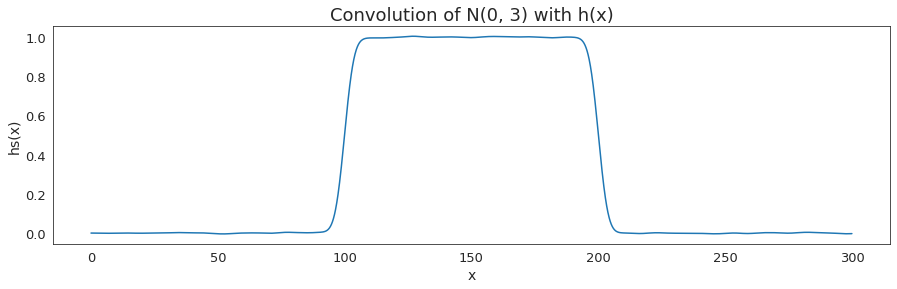

In [16]:
fig = plt.figure(figsize = (15, 4))

plt.title('Convolution of N(0, 3) with h(x)')

plt.xlabel('x')
plt.ylabel('hs(x)')

plt.plot(x, hs)

In [17]:
def central_derivate(y, x = [], dx = 1, edges = False):
    n = len(y)
    
    dx = dx*2
    
    if len(x) == n:
        dx = 2*(x[1] - x[0])
    
    dydx = np.zeros(n)
    
    for i in range(1, n-1):
        
        dy = y[i+1] - y[i-1]
        
        dydx[i] = dy/dx
    
    if edges:
        dydx[0] = dydx[1]
        dydx[n-1] = dydx[n-2]
        
    return dydx

In [18]:
dhsdx = central_derivate(hs, x, edges = True)

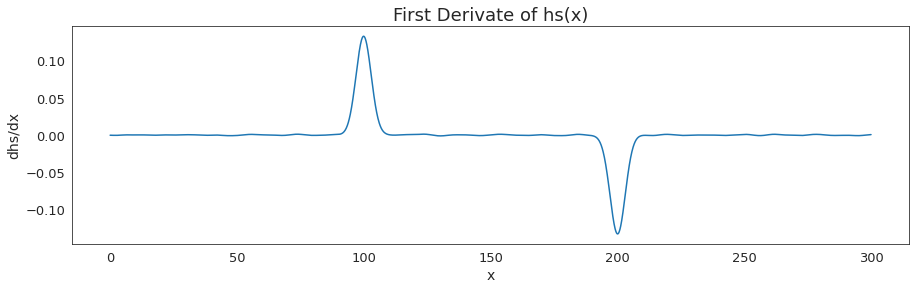

In [19]:
fig = plt.figure(figsize = (15, 4))

plt.title('First Derivate of hs(x)')

plt.xlabel('x')
plt.ylabel('dhs/dx')

plt.plot(x, dhsdx)

In [20]:
def central_derivate2(y, x = [], dx = 1, edges = False):
    n = len(y)
    
    dx2 = (dx)**2
    
    if len(x) == n:
        dx2 = (x[1] - x[0])**2
    
    d2ydx2 = np.zeros(n)
    
    for i in range(1, n-1):
        
        d2y = y[i+1] -2*y[i] + y[i-1]
        
        d2ydx2[i] = d2y/dx2
    
    if edges:
        d2ydx2[0] = d2ydx2[1]
        d2ydx2[n-1] = d2ydx2[n-2]

    return d2ydx2

In [21]:
d2hsdx2 = central_derivate2(hs, x, edges = True)

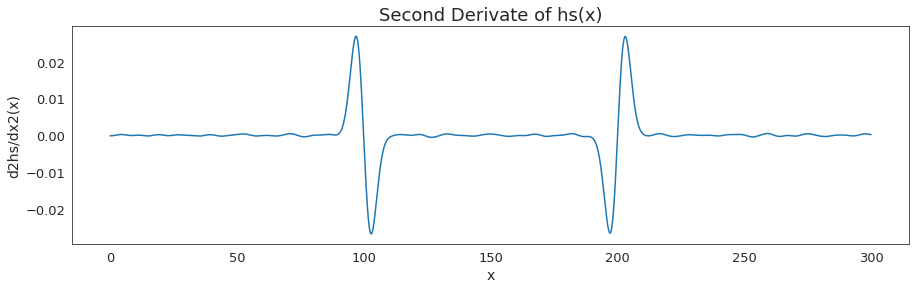

In [22]:
fig = plt.figure(figsize = (15, 4))

plt.title('Second Derivate of hs(x)')

plt.xlabel('x')
plt.ylabel('d2hs/dx2(x)')

plt.plot(x, d2hsdx2)

<hr></hr>

### **6. Masks**

<hr></hr>

In [14]:
img = mpimg.imread('./planta.jpg')

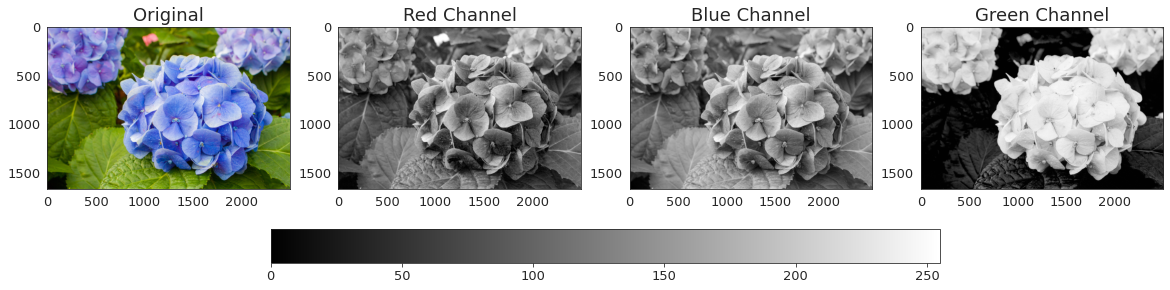

In [24]:
fig, ax = plt.subplots(1, 4, figsize = (20, 5))

titles = ['Red Channel', 'Blue Channel', 'Green Channel']
types = ['gray', 'gray', 'gray']

ax[0].imshow(img)
ax[0].set_title('Original')

for i, a in enumerate(ax.flat[1:]):
    
    pcm = a.imshow(img[:, :, i], cmap = types[i])
    a.set_title(titles[i])

fig.colorbar(pcm, ax=ax[:], shrink=0.6, location='bottom')

### Robert Cross Operator

In [25]:
rcox = np.array([
                [ 0, 1],
                [-1, 0]
]) 

rcoy = np.array([
                [ 1, 0],
                [0, -1]
]) 

In [26]:
rco_image_channels = []

In [27]:
for i in range(3):
    
    image_channel = img[:, :, i]
    
    drcox = np.absolute(signal.convolve2d(image_channel, rcox, boundary='symm', mode='same'))
    drcoy = np.absolute(signal.convolve2d(image_channel, rcoy, boundary='symm', mode='same'))
    
    drcom = np.sqrt(drcox**2 + drcoy**2)
    
    rco_image_channels.append([image_channel, drcox, drcoy, drcom])

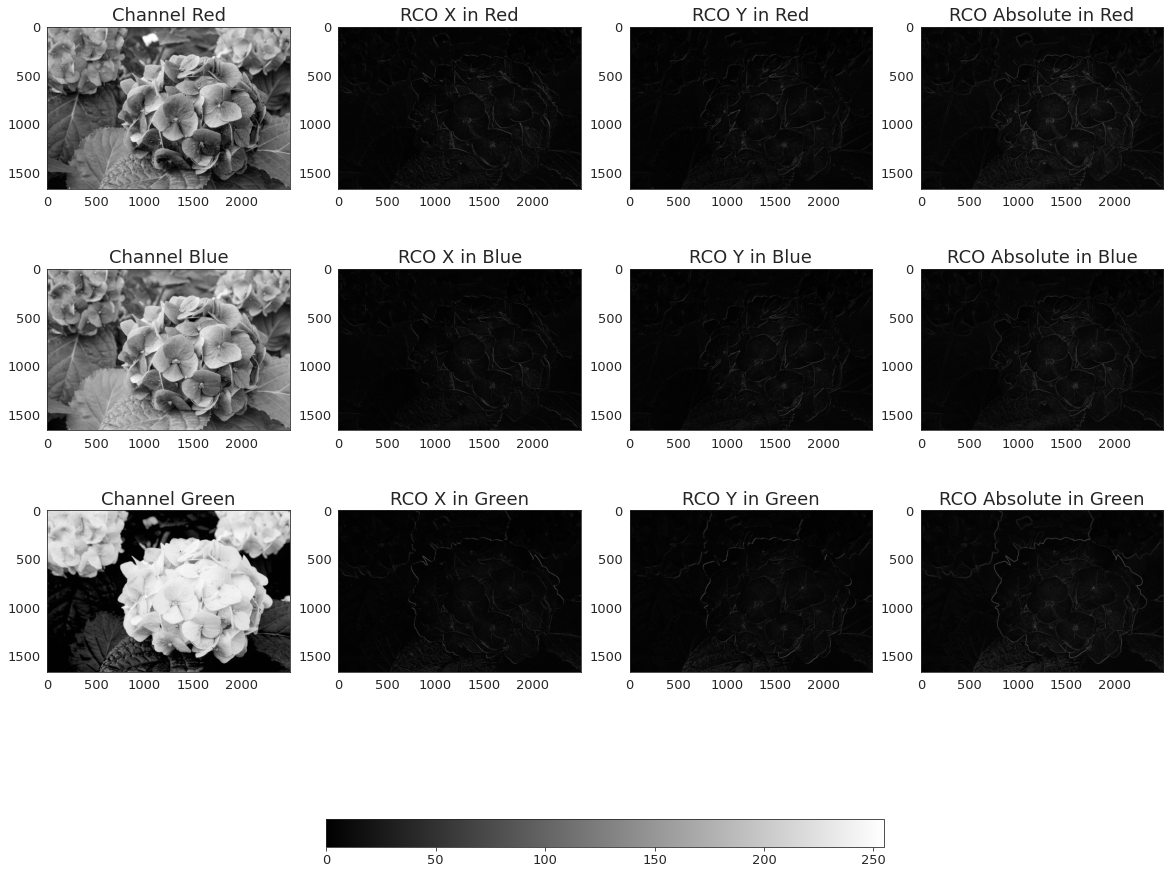

In [28]:
fig, axes = plt.subplots(3, 4, figsize = (20,18))

sub_titles = [['Red', 'Blue', 'Green'],['Channel ', 'RCO X in ', 'RCO Y in ', 'RCO Absolute in ']]

for i, channel in enumerate(rco_image_channels):
    for j, im in enumerate(channel):
        ax = axes[i][j]
        ax.imshow(im, cmap='gray')
        ax.set_title(sub_titles[1][j] + sub_titles[0][i])
        
fig.colorbar(gray_colormap, ax=axes[:], shrink=0.5, location='bottom')

### Sobel Operator

In [29]:
sox = np.array([
                [-1, 0, 1],
                [-2, 0, 2],
                [-1, 0, 1]
]) 

soy = np.array([
                [1, 2, 1],
                [0, 0, 0],
                [-1, -2, -1]
]) 

In [30]:
so_image_channels = []

In [31]:
for i in range(3):
    
    image_channel = img[:, :, i]
    
    dsox = np.absolute(signal.convolve2d(image_channel, sox, boundary='symm', mode='same'))
    dsoy = np.absolute(signal.convolve2d(image_channel, soy, boundary='symm', mode='same'))
    
    dsom = np.sqrt(dsox**2 + dsoy**2)
    
    so_image_channels.append([image_channel, dsox, dsoy, dsom])

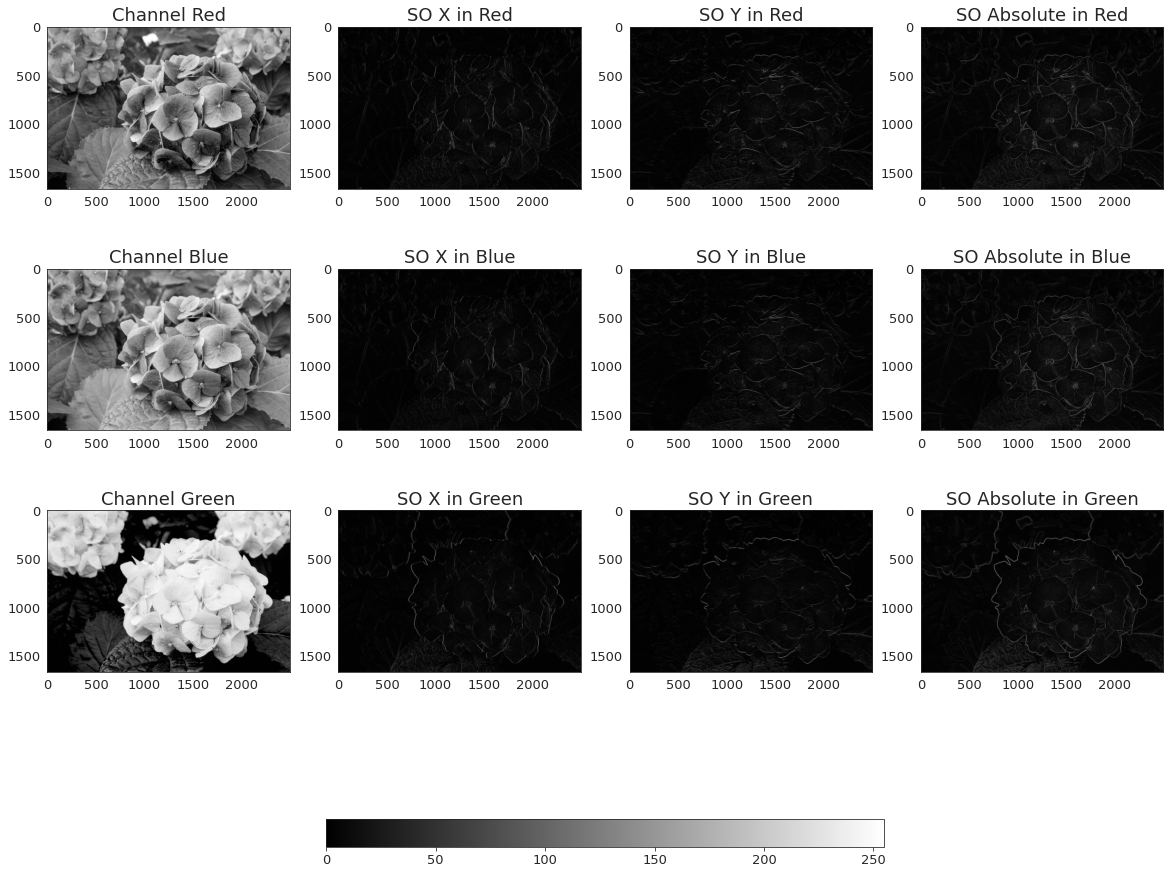

In [32]:
fig, axes = plt.subplots(3, 4, figsize = (20,18))

sub_titles = [['Red', 'Blue', 'Green'],['Channel ', 'SO X in ', 'SO Y in ', 'SO Absolute in ']]

for i, channel in enumerate(so_image_channels):
    for j, im in enumerate(channel):
        
        ax = axes[i][j]
        
        ax.imshow(im, cmap='gray')
        ax.set_title(sub_titles[1][j] + sub_titles[0][i])
        
fig.colorbar(gray_colormap, ax=axes[:], shrink=0.5, location='bottom')

<hr></hr>

### **6. The Gradiente in the Fourier Domain**

In [85]:
norm_image = img[:, :, 0]

<hr></hr>

In [86]:
f_im = np.fft.fft2(norm_image)
f_im_shift = np.fft.fftshift(f_im)
im_ifft = np.fft.ifft2(f_im)
magnitude_spectrum = 20*np.log(1+np.abs(f_im_shift))

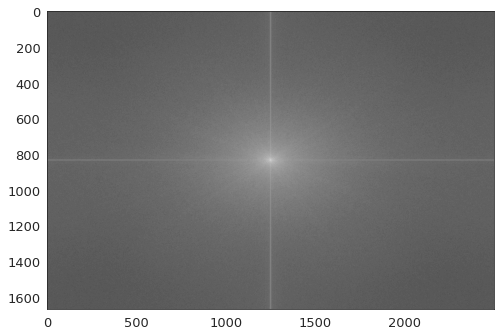

In [87]:
fig = plt.figure(figsize = (8,8))
plt.imshow(magnitude_spectrum, cmap ='gray')

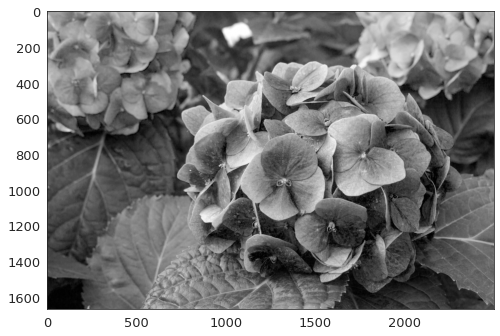

In [88]:
fig = plt.figure(figsize = (8,8))
plt.imshow(np.abs(im_ifft), cmap ='gray')

<hr></hr>

In [11]:
norm = mpl.colors.Normalize(vmin=0, vmax=255)
gray_colormap = cm.ScalarMappable(norm=norm, cmap='gray')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from matplotlib import cm
from scipy import signal
from scipy import misc
import seaborn as sns
from scipy import signal

<hr></hr>

### **6. Globally Setting**

<hr></hr>

In [7]:
%matplotlib inline

In [8]:
sns.set_style('white') # darkgrid, white grid, dark, white and ticks

In [9]:
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

In [3]:
sns.color_palette("viridis", 20) # color palette exemple

[(0.280267, 0.073417, 0.397163),
 (0.282884, 0.13592, 0.453427),
 (0.275191, 0.194905, 0.496005),
 (0.258965, 0.251537, 0.524736),
 (0.237441, 0.305202, 0.541921),
 (0.212395, 0.359683, 0.55171),
 (0.190631, 0.407061, 0.556089),
 (0.171176, 0.45253, 0.557965),
 (0.153364, 0.497, 0.557724),
 (0.136408, 0.541173, 0.554483),
 (0.121831, 0.589055, 0.545623),
 (0.122312, 0.633153, 0.530398),
 (0.150148, 0.676631, 0.506589),
 (0.20803, 0.718701, 0.472873),
 (0.288921, 0.758394, 0.428426),
 (0.395174, 0.797475, 0.367757),
 (0.506271, 0.828786, 0.300362),
 (0.626579, 0.854645, 0.223353),
 (0.751884, 0.874951, 0.143228),
 (0.876168, 0.891125, 0.09525)]

In [6]:
sns.color_palette("viridis", 20)[3]

(0.258965, 0.251537, 0.524736)